In [18]:
#importing necessary libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets,layers,models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#read the CIFAR10 datasets from keras
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [20]:
#check the number of records
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [21]:
#number of unique classes
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [22]:
#create a list of all class labels
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

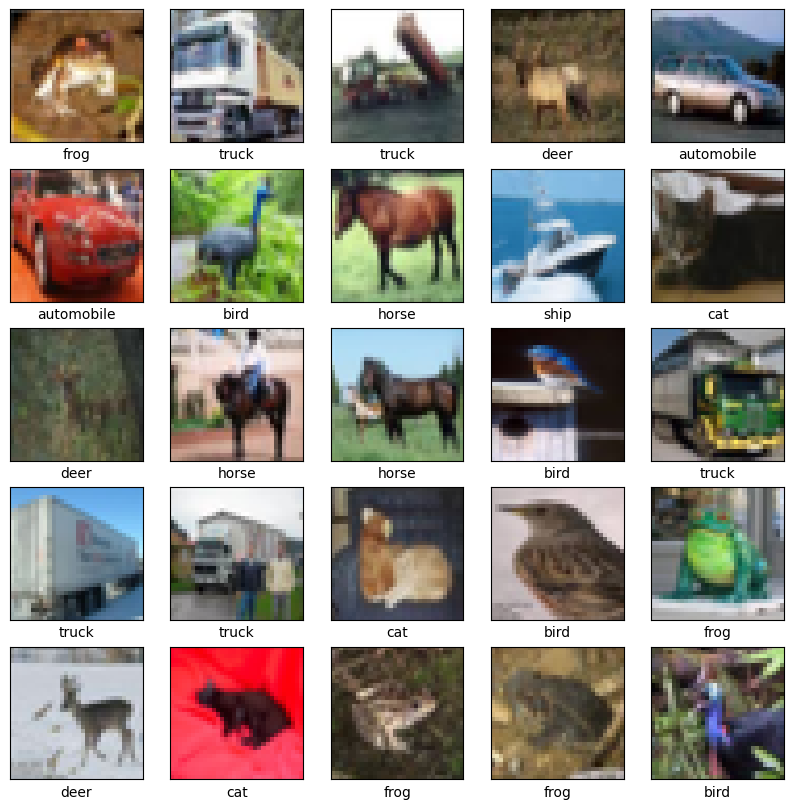

In [23]:
#visualize the sample images from the training images 
plt.figure(figsize=[10,10])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [24]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [25]:
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")

In [26]:
train_images[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

In [27]:
#normalization
train_images=train_images/255
test_images=test_images/255

In [28]:
train_images[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [29]:
#one hot encoding for the target classes
num_classes=10
train_labels=np_utils.to_categorical(train_labels,num_classes)
test_labels=np_utils.to_categorical(test_labels,num_classes)

In [30]:
train_labels[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
#build the model
#  build the CNN model

model = Sequential()
model.add(layers.Conv2D( filters = 32,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                         data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                         use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                         kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                         kernel_constraint=None, bias_constraint=None,input_shape = (32,32,3)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters = 32,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters = 64,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(units = 128 ,activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                       bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                       activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = num_classes ,activation='softmax', use_bias=True, kernel_initializer="glorot_uniform",
                       bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                       activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [33]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'],
              loss_weights=None, weighted_metrics=None, run_eagerly=None,
              steps_per_execution=None, jit_compile=None,)

In [17]:
history = model.fit(train_images, train_labels, batch_size= 64, epochs= 5, validation_data= (test_images, test_labels))

Epoch 1/5
782/782 [==============================] - 25s 11ms/step - loss: 1.5339 - accuracy: 0.4699 - val_loss: 1.2618 - val_accuracy: 0.5582
Epoch 2/5
782/782 [==============================] - 8s 10ms/step - loss: 1.0874 - accuracy: 0.6161 - val_loss: 1.2393 - val_accuracy: 0.5578
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.9738 - accuracy: 0.6597 - val_loss: 1.0691 - val_accuracy: 0.6387
Epoch 4/5
782/782 [==============================] - 8s 10ms/step - loss: 0.9030 - accuracy: 0.6862 - val_loss: 0.8336 - val_accuracy: 0.7109
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.8534 - accuracy: 0.7044 - val_loss: 1.0918 - val_accuracy: 0.6927


In [17]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

Text(0.5, 1.0, 'Accuracy Curves')

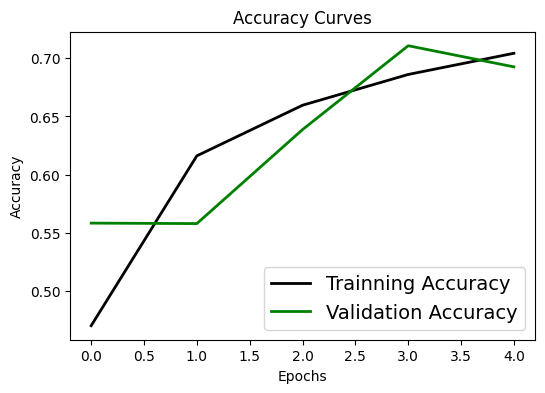

In [34]:
# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

In [35]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 2s 5ms/step
[[0.10277424 0.10244225 0.13947548 ... 0.0880376  0.09477177 0.08814639]
 [0.09796228 0.09818585 0.13370657 ... 0.08683725 0.10865063 0.07724404]
 [0.10158612 0.10399808 0.14173342 ... 0.08203771 0.10188998 0.08108165]
 ...
 [0.11173384 0.09526476 0.11595292 ... 0.08661898 0.09989624 0.09278621]
 [0.10624491 0.10328075 0.13227753 ... 0.08059151 0.10118394 0.0822435 ]
 [0.10173005 0.09904956 0.12510805 ... 0.07938817 0.10545603 0.09145501]]


In [36]:
pred_classes = np.argmax(pred, axis = 1)
print(pred_classes)

[2 2 2 ... 2 2 2]


In [43]:
history= model.fit(train_images, train_labels, batch_size= 64, epochs= 10, validation_data= (test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 0.5426 - accuracy: 0.8081 - val_loss: 0.6171 - val_accuracy: 0.7879
Epoch 2/10
782/782 [==============================] - 7s 10ms/step - loss: 0.5408 - accuracy: 0.8075 - val_loss: 0.6543 - val_accuracy: 0.7798
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5339 - accuracy: 0.8137 - val_loss: 0.6519 - val_accuracy: 0.7761
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5292 - accuracy: 0.8139 - val_loss: 0.6106 - val_accuracy: 0.7887
Epoch 5/10
782/782 [==============================] - 7s 10ms/step - loss: 0.5204 - accuracy: 0.8167 - val_loss: 0.6083 - val_accuracy: 0.7944
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5154 - accuracy: 0.8187 - val_loss: 0.6258 - val_accuracy: 0.7909
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5084 - accuracy: 0.8196 - val_loss: 0.6125 - val_accuracy: 0.7950

Text(0.5, 1.0, 'Accuracy Curves')

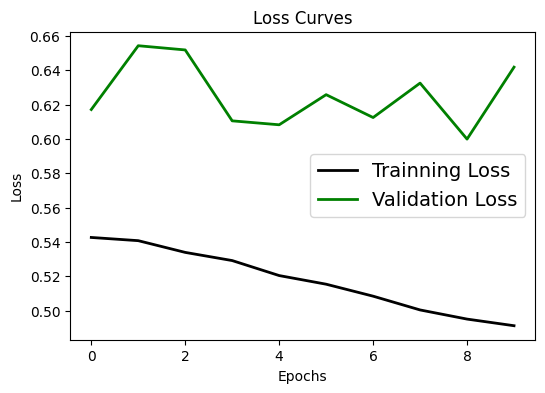

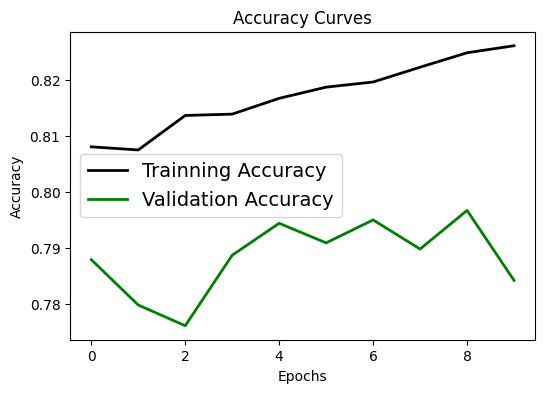

In [44]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

In [45]:
history= model.fit(train_images, train_labels, batch_size= 64, epochs= 50, validation_data= (test_images, test_labels))

Epoch 1/50
782/782 [==============================] - 8s 11ms/step - loss: 0.4866 - accuracy: 0.8272 - val_loss: 0.6566 - val_accuracy: 0.7804
Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 0.4797 - accuracy: 0.8297 - val_loss: 0.6237 - val_accuracy: 0.7951
Epoch 3/50
782/782 [==============================] - 10s 13ms/step - loss: 0.4733 - accuracy: 0.8322 - val_loss: 0.6517 - val_accuracy: 0.7864
Epoch 4/50
782/782 [==============================] - 8s 11ms/step - loss: 0.4690 - accuracy: 0.8328 - val_loss: 0.6285 - val_accuracy: 0.7939
Epoch 5/50
782/782 [==============================] - 8s 11ms/step - loss: 0.4621 - accuracy: 0.8355 - val_loss: 0.7253 - val_accuracy: 0.7659
Epoch 6/50
782/782 [==============================] - 8s 10ms/step - loss: 0.4660 - accuracy: 0.8354 - val_loss: 0.6175 - val_accuracy: 0.7986
Epoch 7/50
782/782 [==============================] - 8s 10ms/step - loss: 0.4619 - accuracy: 0.8368 - val_loss: 0.6667 - val_accuracy: 0.783

Text(0.5, 1.0, 'Accuracy Curves')

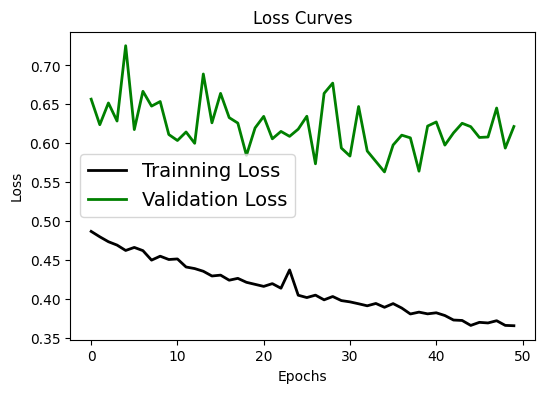

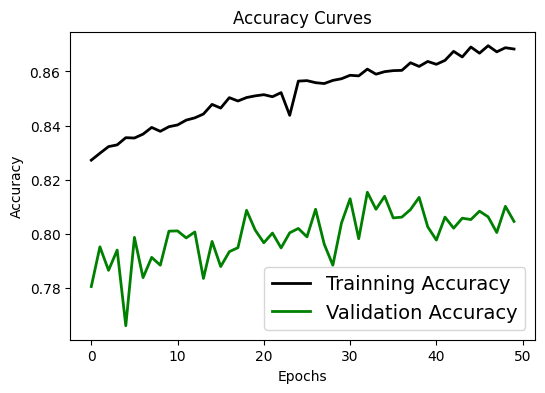

In [46]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

In [47]:
history= model.fit(train_images, train_labels, batch_size= 64, epochs= 100, validation_data= (test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 9s 12ms/step - loss: 0.3649 - accuracy: 0.8691 - val_loss: 0.5881 - val_accuracy: 0.8110
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 0.3649 - accuracy: 0.8701 - val_loss: 0.6459 - val_accuracy: 0.8002
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 0.3616 - accuracy: 0.8721 - val_loss: 0.5971 - val_accuracy: 0.8095
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 0.3585 - accuracy: 0.8714 - val_loss: 0.5915 - val_accuracy: 0.8120
Epoch 5/100
782/782 [==============================] - 7s 9ms/step - loss: 0.3572 - accuracy: 0.8700 - val_loss: 0.6129 - val_accuracy: 0.8064
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 0.3576 - accuracy: 0.8717 - val_loss: 0.6191 - val_accuracy: 0.8035
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 0.3569 - accuracy: 0.8718 - val_loss: 0.5863 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy Curves')

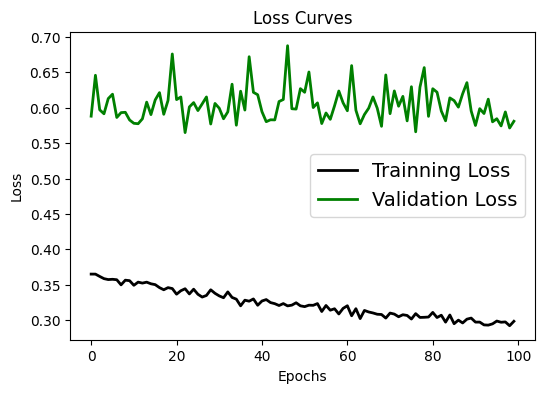

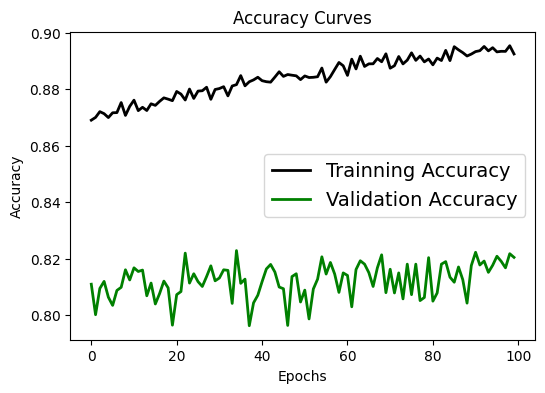

In [48]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

In [49]:
history= model.fit(train_images, train_labels, batch_size= 64, epochs= 150, validation_data= (test_images, test_labels))

Epoch 1/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2953 - accuracy: 0.8940 - val_loss: 0.6011 - val_accuracy: 0.8208
Epoch 2/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2962 - accuracy: 0.8938 - val_loss: 0.6266 - val_accuracy: 0.8135
Epoch 3/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2906 - accuracy: 0.8947 - val_loss: 0.5973 - val_accuracy: 0.8160
Epoch 4/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2978 - accuracy: 0.8938 - val_loss: 0.6153 - val_accuracy: 0.8125
Epoch 5/150
782/782 [==============================] - 7s 9ms/step - loss: 0.2944 - accuracy: 0.8948 - val_loss: 0.5958 - val_accuracy: 0.8195
Epoch 6/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2898 - accuracy: 0.8967 - val_loss: 0.6317 - val_accuracy: 0.8104
Epoch 7/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2924 - accuracy: 0.8949 - val_loss: 0.5982 - val_accuracy: 

Text(0.5, 1.0, 'Accuracy Curves')

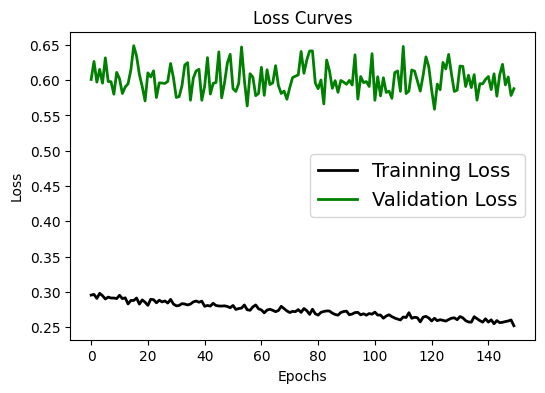

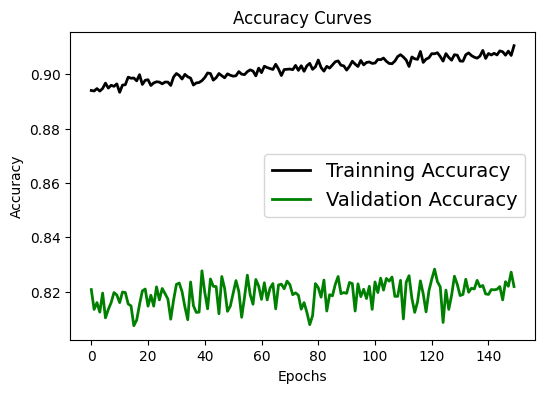

In [50]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

In [51]:
#  build the CNN model

model = Sequential()
model.add(layers.Conv2D( filters = 32,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                         data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                         use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                         kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                         kernel_constraint=None, bias_constraint=None,input_shape = (32,32,3)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters = 32,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())

model.add(layers.AvgPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters = 64,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())

model.add(layers.AvgPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())

model.add(layers.AvgPool2D(pool_size= (2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters = 64,kernel_size = (3,3) ,strides=(1, 1),padding="same",
                 data_format=None, dilation_rate=(1, 1), groups=1, activation='relu', 
                 use_bias=True, kernel_initializer="glorot_uniform",bias_initializer="zeros", 
                 kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))

model.add(layers.Flatten())
model.add(layers.Dense(units = 128 ,activation='relu', use_bias=True, kernel_initializer="glorot_uniform",
                       bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                       activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = num_classes ,activation='softmax', use_bias=True, kernel_initializer="glorot_uniform",
                       bias_initializer="zeros", kernel_regularizer=None, bias_regularizer=None,
                       activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

In [53]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'],
              loss_weights=None, weighted_metrics=None, run_eagerly=None,
              steps_per_execution=None, jit_compile=None,)

In [54]:
history= model.fit(train_images, train_labels, batch_size= 64, epochs= 150, validation_data= (test_images, test_labels))

Epoch 1/150
782/782 [==============================] - 13s 11ms/step - loss: 1.6501 - accuracy: 0.4198 - val_loss: 1.2773 - val_accuracy: 0.5406
Epoch 2/150
782/782 [==============================] - 8s 10ms/step - loss: 1.1995 - accuracy: 0.5741 - val_loss: 1.0848 - val_accuracy: 0.6168
Epoch 3/150
782/782 [==============================] - 8s 11ms/step - loss: 1.0339 - accuracy: 0.6334 - val_loss: 0.8711 - val_accuracy: 0.6940
Epoch 4/150
782/782 [==============================] - 8s 11ms/step - loss: 0.9335 - accuracy: 0.6709 - val_loss: 0.9016 - val_accuracy: 0.6858
Epoch 5/150
782/782 [==============================] - 8s 10ms/step - loss: 0.8798 - accuracy: 0.6936 - val_loss: 0.8411 - val_accuracy: 0.7105
Epoch 6/150
782/782 [==============================] - 8s 10ms/step - loss: 0.8352 - accuracy: 0.7111 - val_loss: 0.7253 - val_accuracy: 0.7488
Epoch 7/150
782/782 [==============================] - 8s 10ms/step - loss: 0.7987 - accuracy: 0.7211 - val_loss: 0.7490 - val_accuracy

Text(0.5, 1.0, 'Accuracy Curves')

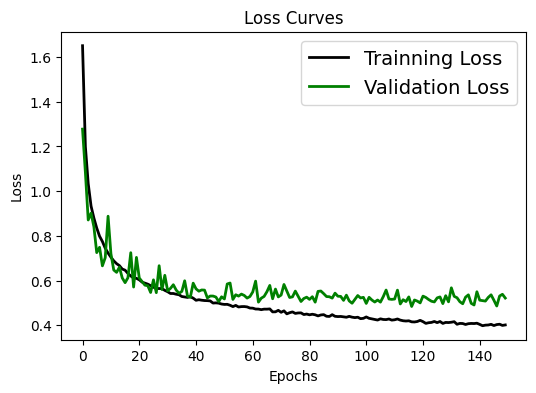

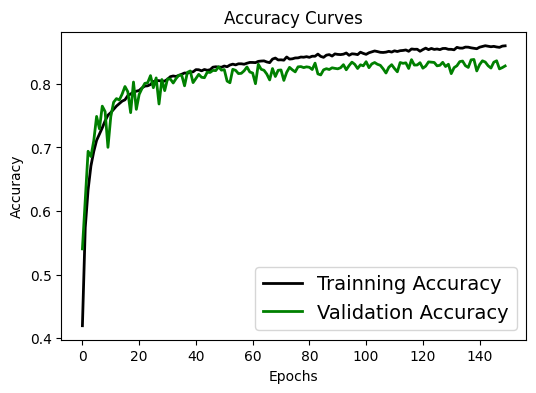

In [55]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

In [ ]:
#from the loss curve plot we find the model is good fit